0.9121649638830885
0.7431580111547728
0.8054752858258434
0.8980918705544537
0.8469375084947262
0.7705173677203029
0.7123472366703782
0.881506736681006
0.792773455663673
0.8715801308889518
0.7691209221394325
0.7729287312705286
0.9129892391357829
0.7891870127393599
0.9107560885043673
0.7911694258814763
0.8442747716685186
0.738201817056504
0.8977978049065828
0.7496154120840187
0.8904359015675806
0.939696656525638
0.7780173944241631
0.881555780383412
0.844494220621348
0.7963426414686162
0.8059325570549049
0.8998991970629027
0.7420626387912368
0.7433168021241199
Coefficient: 
 [ 0.13966639  0.9699203  -0.1510663  -0.32685506  0.04037573]
Intercept: 
 -1.275483356867431
9.279347104143332 [11  9  1  1 19] 10
16.304037548685393 [18 16  3  0  0] 16
7.798828180330069 [11  8  2  0  2] 8
14.025949239136173 [15 14  3  0  2] 15
13.956597692482127 [14 14  2  0  0] 14
7.9753792348371455 [6 9 1 1 4] 8
3.934195118293979 [6 5 1 1 0] 0
12.695944704703319 [13 13  3  0  0] 13
5.697283663413643 [7 7 2 2 4] 9

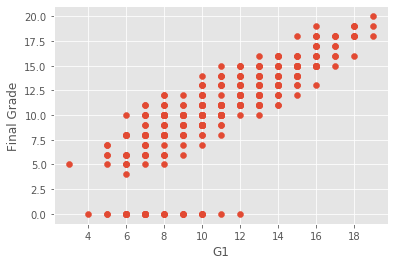

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
    with open("studentgrades.pickle", "wb") as f:
        pickle.dump(linear, f)

pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

p = 'G1'
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()